# K-means Clustering

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


### Load the dataset

In [6]:
data_path = 'season-2425.csv'  # Ensure this is the correct path if running locally
data = pd.read_csv(data_path)

### Display dataset information


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      177 non-null    object
 1   HomeTeam  177 non-null    object
 2   AwayTeam  177 non-null    object
 3   FTHG      177 non-null    int64 
 4   FTAG      177 non-null    int64 
 5   FTR       177 non-null    object
 6   HTHG      177 non-null    int64 
 7   HTAG      177 non-null    int64 
 8   HTR       177 non-null    object
 9   Referee   177 non-null    object
 10  HS        177 non-null    int64 
 11  AS        177 non-null    int64 
 12  HST       177 non-null    int64 
 13  AST       177 non-null    int64 
 14  HF        177 non-null    int64 
 15  AF        177 non-null    int64 
 16  HC        177 non-null    int64 
 17  AC        177 non-null    int64 
 18  HY        177 non-null    int64 
 19  AY        177 non-null    int64 
 20  HR        177 non-null    int64 
 21  AR        177 no

### Select numerical columns for clustering

In [8]:
# Here we focus on match stats like goals, shots, and fouls
selected_columns = ['FTHG', 'FTAG', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC']
clustering_data = data[selected_columns]

### Handle missing values (if any)

In [9]:
clustering_data = clustering_data.dropna()

### Standardize the data

In [10]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

### Perform PCA for visualization (reduce to 2 dimensions)

In [11]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

### Optimal number of clusters using the Elbow Method

C:\Users\sakth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sakth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sakth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sakth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

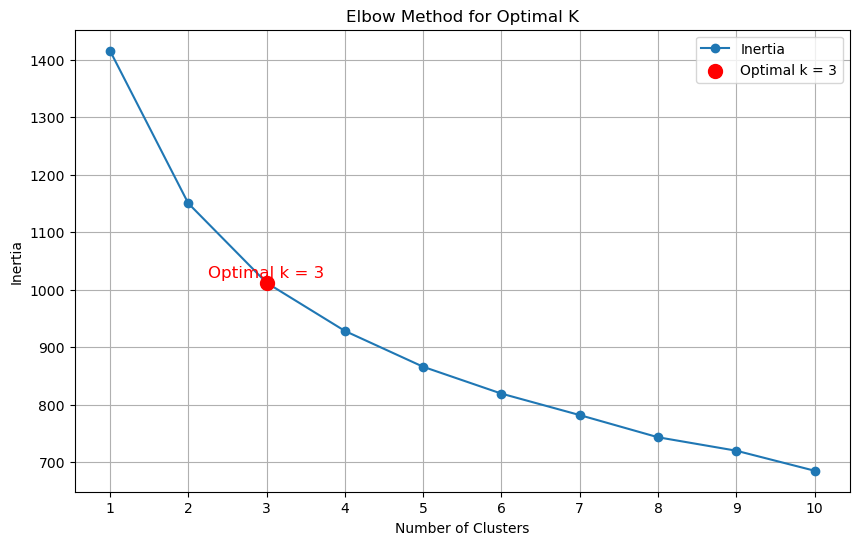

In [12]:
# Find the optimal number of clusters using the Elbow Method
inertia = []
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)  # This uses the scaled_data that was defined above
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o', label='Inertia')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.grid()

# Highlight the optimal point (for example, let's assume it's k=3)
optimal_k = 3
plt.scatter(optimal_k, inertia[optimal_k-1], color='red', s=100, zorder=5, label=f'Optimal k = {optimal_k}')

# Optionally add a text annotation to explain the optimal point
plt.text(optimal_k, inertia[optimal_k-1] + 10, f'Optimal k = {optimal_k}', 
         color='red', ha='center', fontsize=12)

plt.legend()
plt.show()

### Perform K-means clustering with an optimal k (e.g., k=3)

In [13]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

C:\Users\sakth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sakth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### Add cluster labels to the dataset

In [14]:
data['Cluster'] = clusters

### Visualize clusters in 2D PCA space

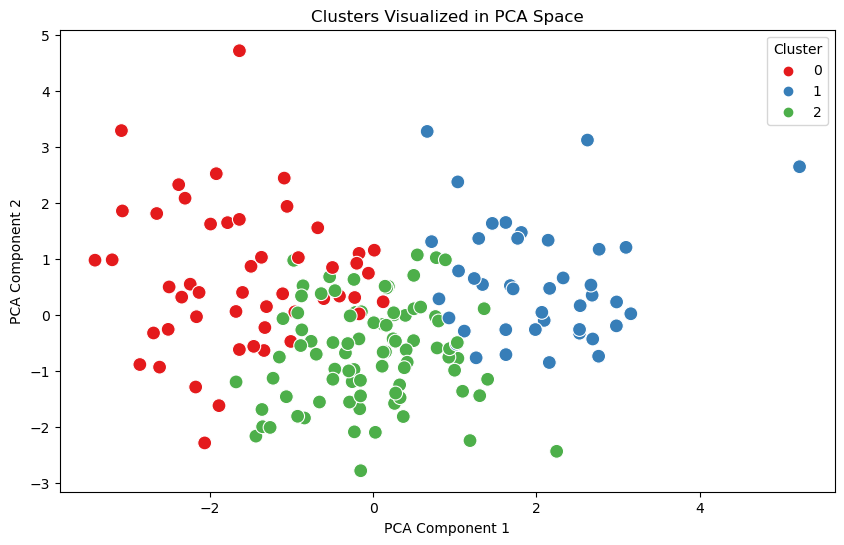

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=principal_components[:, 0],
    y=principal_components[:, 1],
    hue=clusters,
    palette='Set1',
    s=100
)
plt.title('Clusters Visualized in PCA Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

### Calculate and display model efficiency using Silhouette Score

In [16]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(scaled_data, clusters)
print(f"Silhouette Score for the model: {silhouette_avg:.2f}")

Silhouette Score for the model: 0.15


### Save clustered data to a new CSV file

In [17]:
data.to_csv('clustered_football_data.csv', index=False)